<a href="https://colab.research.google.com/github/Fynn990/Data_analysis/blob/main/Fast_food_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**Load the dataset and display the first 10 rows**

In [ ]:
pd.read_csv('/content/sample_data/fast_food_sales.csv').head(10)

,order_id,date,item_name,category,quantity,unit_price,payment_method,branch,customer_rating
0,1,06/01/2024,Iced Tea,Wraps,5,2.00,MobileMoney,Eastside,2.0
1,2,26/03/2024,Iced Tea,Wraps,10,30.09,MobileMoney,Downtown,NaN
2,3,04/07/2024,Orange Juice,Wraps,6,14.53,Card,Uptown,4.0
3,4,11/07/2024,Veggie Burger,Desserts,1,39.32,MobileMoney,Mall,4.0
4,5,09/02/2026,Veggie Burger,Pizza,2,39.37,MobileMoney,West End,4.0
5,6,09/08/2023,Chicken Wings,Burger,8,3.72,Card,Downtown,3.0
6,7,13/10/2024,Fries,Salads,5,37.91,Card,Uptown,4.0
7,8,22/05/2026,Chicken Wings,Sides,6,21.70,MobileMoney,Airport,2.0
8,9,12/07/2025,Veggie Burger,Desserts,8,2.42,Cash,Uptown,2.0
9,10,31/05/2023,Chocolate Shake,Wraps,1,1.74,Cash,Downtown,NaN


**Check the structure of the dataset.**

In [ ]:
df = pd.read_csv('/content/sample_data/fast_food_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         1000 non-null   int64  
 1   date             1000 non-null   object 
 2   item_name        1000 non-null   object 
 3   category         1000 non-null   object 
 4   quantity         1000 non-null   int64  
 5   unit_price       1000 non-null   float64
 6   payment_method   1000 non-null   object 
 7   branch           1000 non-null   object 
 8   customer_rating  876 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


**Change index to date column and change the datatype to datetime**

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True)
df.set_index('date', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2024-01-06 to 2023-08-01
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         1000 non-null   int64  
 1   item_name        1000 non-null   object 
 2   category         1000 non-null   object 
 3   quantity         1000 non-null   int64  
 4   unit_price       1000 non-null   float64
 5   payment_method   1000 non-null   object 
 6   branch           1000 non-null   object 
 7   customer_rating  876 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 70.3+ KB


In [ ]:
df.head()

,order_id,item_name,category,quantity,unit_price,payment_method,branch,customer_rating
date,,,,,,,,
2024-01-06,1,Iced Tea,Wraps,5,2.00,MobileMoney,Eastside,2.0
2024-03-26,2,Iced Tea,Wraps,10,30.09,MobileMoney,Downtown,NaN
2024-07-04,3,Orange Juice,Wraps,6,14.53,Card,Uptown,4.0
2024-07-11,4,Veggie Burger,Desserts,1,39.32,MobileMoney,Mall,4.0
2026-02-09,5,Veggie Burger,Pizza,2,39.37,MobileMoney,West End,4.0


**Find the number of empty spaces in each column**

In [ ]:
df.isna().sum()

,0
order_id,0
item_name,0
category,0
quantity,0
unit_price,0
payment_method,0
branch,0
customer_rating,124


**Create a total_sales Column**

In [ ]:
df['total_sales'] = df['unit_price'] * df['quantity']

In [ ]:
df.head(5)

,order_id,item_name,category,quantity,unit_price,payment_method,branch,customer_rating,total_sales
date,,,,,,,,,
2024-01-06,1,Iced Tea,Wraps,5,2.00,MobileMoney,Eastside,2.0,10.00
2024-03-26,2,Iced Tea,Wraps,10,30.09,MobileMoney,Downtown,NaN,300.90
2024-07-04,3,Orange Juice,Wraps,6,14.53,Card,Uptown,4.0,87.18
2024-07-11,4,Veggie Burger,Desserts,1,39.32,MobileMoney,Mall,4.0,39.32
2026-02-09,5,Veggie Burger,Pizza,2,39.37,MobileMoney,West End,4.0,78.74


In [ ]:
df['total_sales'].describe()

,total_sales
count,1000.000000
mean,111.320520
std,89.248828
min,1.030000
25%,39.310000
50%,83.580000
75%,165.562500
max,394.700000


<Axes: >

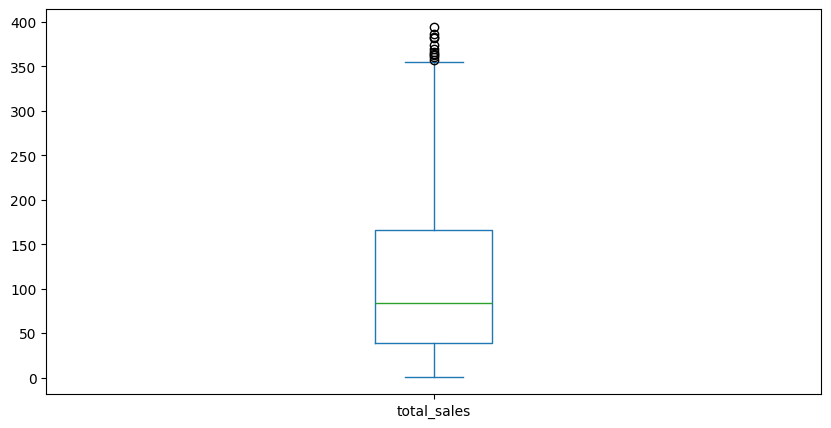

In [ ]:
df['total_sales'].plot(kind='box', figsize=(10,5))

**Check for duplicate orders and remove them if any exist.**

In [ ]:
df.duplicated().sum()

np.int64(0)

**Calculate basic statistics for numerical columns.**

In [ ]:
df.describe()

,order_id,quantity,unit_price,customer_rating,total_sales
count,1000.000000,1000.000000,1000.000000,876.000000,1000.000000
mean,500.500000,5.510000,20.247800,2.925799,111.320520
std,288.819436,2.868122,11.089632,1.398847,89.248828
min,1.000000,1.000000,1.020000,1.000000,1.030000
25%,250.750000,3.000000,10.665000,2.000000,39.310000
50%,500.500000,6.000000,19.925000,3.000000,83.580000
75%,750.250000,8.000000,30.225000,4.000000,165.562500
max,1000.000000,10.000000,39.880000,5.000000,394.700000


In [ ]:
df['total_sales'].describe()

,total_sales
count,1000.000000
mean,111.320520
std,89.248828
min,1.030000
25%,39.310000
50%,83.580000
75%,165.562500
max,394.700000


**Top 5 best-selling and worst-selling menu items by total sales**

In [ ]:
df['item_name'].nunique()

10

In [ ]:
items_sale = df.groupby('item_name')['total_sales'].sum().sort_values(ascending=False)
items_sale

,total_sales
item_name,
Veggie Burger,13883.09
Pepperoni Pizza,12848.01
Iced Tea,11910.10
Orange Juice,11646.05
Fries,11383.12
Coke,10739.20
Chocolate Shake,10386.64
Chicken Wings,10183.52
Margherita Pizza,10061.83


In [ ]:
items_sale.describe()

,total_sales
count,10.000000
mean,11132.052000
std,1575.524727
min,8278.960000
25%,10234.300000
50%,11061.160000
75%,11844.087500
max,13883.090000


In [ ]:
df.groupby('item_name')['total_sales'].sum().nlargest(5)

,total_sales
item_name,
Veggie Burger,13883.09
Pepperoni Pizza,12848.01
Iced Tea,11910.10
Orange Juice,11646.05
Fries,11383.12


In [ ]:
df.groupby('item_name')['total_sales'].sum().nsmallest(5)

,total_sales
item_name,
Cheeseburger,8278.96
Margherita Pizza,10061.83
Chicken Wings,10183.52
Chocolate Shake,10386.64
Coke,10739.20


**food category generates the highest revenue**

In [ ]:
df.groupby('category')['total_sales'].sum().nlargest(5)

,total_sales
category,
Wraps,18230.07
Salads,17697.65
Burger,17633.97
Drinks,15560.26
Sides,14189.91


**average customer rating per branch**

In [ ]:
cust_rating = df.groupby('branch')['customer_rating'].mean()
cust_rating

,customer_rating
branch,
Airport,3.053097
Downtown,2.929078
Eastside,3.155172
Mall,2.648000
Riverside,3.127273
Uptown,3.000000
West End,2.666667


# **Time-Based Analysis**

In [ ]:
total_sales_by_date = df.groupby('date')['total_sales'].sum()

In [ ]:
total_sales_by_date

,total_sales
date,
2023-01-01,49.40
2023-01-02,26.84
2023-01-05,72.20
2023-01-07,227.27
2023-01-09,25.96
...,...
2026-12-18,158.04
2026-12-19,33.72
2026-12-20,77.40


In [ ]:
best_sales_day = total_sales_by_date.idxmax()
best_sales_day

Timestamp('2025-12-12 00:00:00')

**analyze monthly sales**

In [ ]:
df.groupby(df.index.month)['total_sales'].sum().sort_values(ascending=False)

,total_sales
date,
10,12323.08
5,9718.64
11,9613.66
7,9342.54
2,9323.86
12,9230.39
9,9079.47
3,9018.61
8,8781.52


In [ ]:
total_sales_by_branch = df.groupby('branch')['total_sales'].sum().sort_values(ascending=False)
display(total_sales_by_branch)

,total_sales
branch,
West End,18304.71
Mall,17876.49
Downtown,17784.92
Uptown,16554.50
Eastside,13751.44
Airport,13561.76
Riverside,13486.70


# **Visualization (Matplotlib)**

**total sales over time (line chart)**

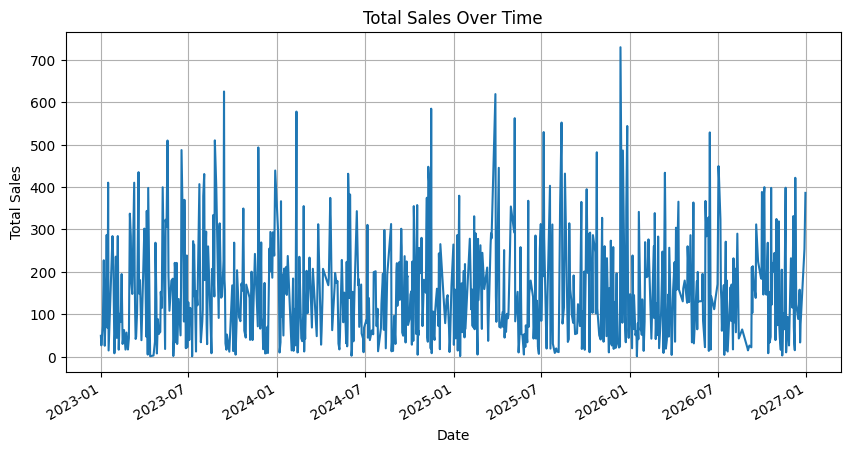

In [ ]:
total_sales_by_date.plot(kind='line', figsize=(10,5))
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

**Revenue by food category**

In [ ]:
rev_by_category = df.groupby('category')['total_sales'].sum()

<Axes: xlabel='category'>

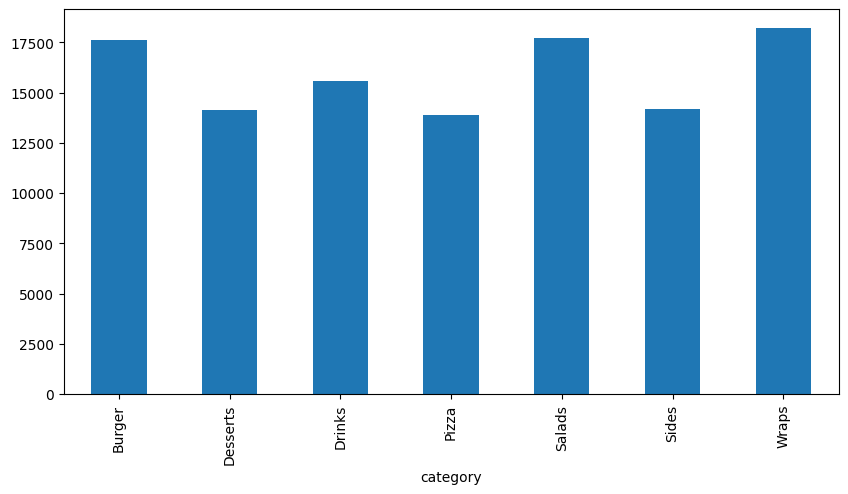

In [ ]:
rev_by_category.plot(kind='bar', figsize=(10,5))

In [ ]:
rev_by_category.describe()

,total_sales
count,7.000000
mean,15902.931429
std,1911.380492
min,13890.470000
25%,14154.050000
50%,15560.260000
75%,17665.810000
max,18230.070000


**top 5 best-selling items**

In [ ]:
best_selling_item = df.groupby('item_name')['total_sales'].sum().nlargest(5)
best_selling_item

,total_sales
item_name,
Veggie Burger,13883.09
Pepperoni Pizza,12848.01
Iced Tea,11910.10
Orange Juice,11646.05
Fries,11383.12


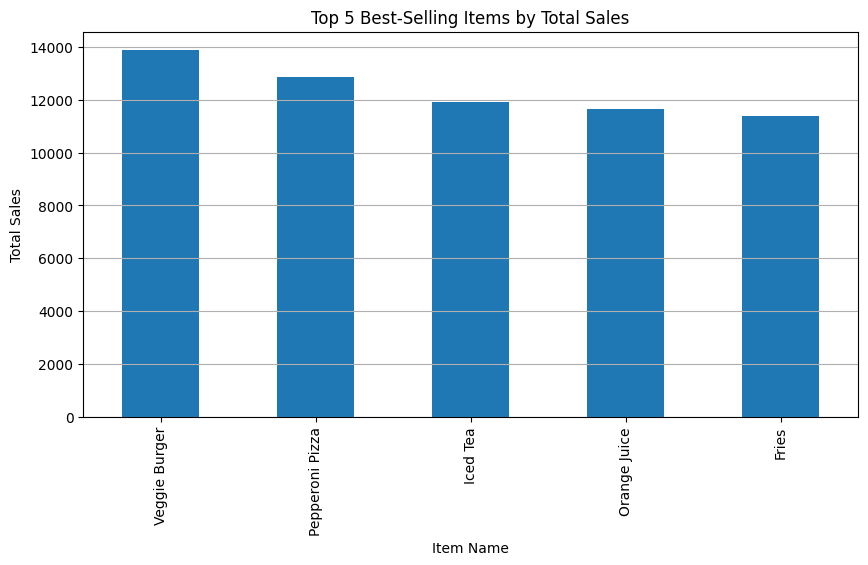

In [ ]:
best_selling_item.plot(kind='bar', figsize=(10,5))
plt.title('Top 5 Best-Selling Items by Total Sales')
plt.xlabel('Item Name')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.show()

**customer rating distribution**

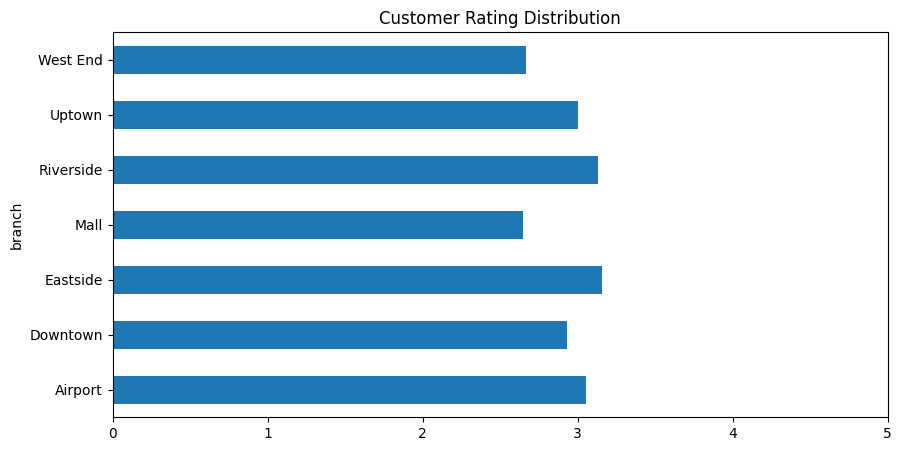

In [ ]:
cust_rating.plot(kind='barh', figsize=(10,5))
plt.title('Customer Rating Distribution')

# **Business Insights & Interpretation**

**Which item should be promoted more?**

<Axes: title={'center': 'Total Sales by Item'}, xlabel='item_name', ylabel='Total Sales'>

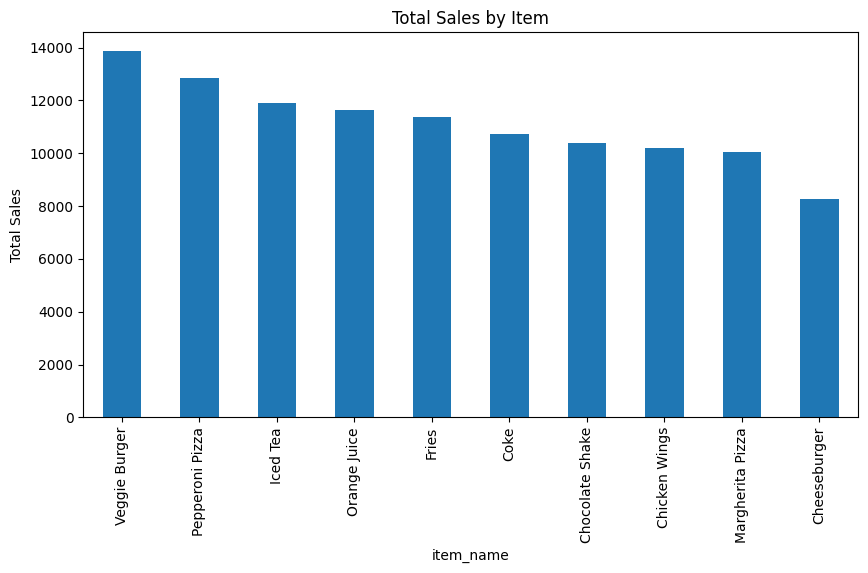

In [ ]:
items_sale.plot(kind='bar', figsize=(10,5), ylabel='Total Sales', title='Total Sales by Item')

Based on the data, the Cheeseburger appears to be the item that needs to be promoted more. It generated the lowest total sales among all menu items, with $8278.96 in sales. Promoting this item could help boost its sales performance and overall revenue. This is more of long term focus.

If the goal is to focus on generating more income in a short term, I would recommend promoting vergie burger and pepperoni pizza since they already generates the largest revenues, indicating high demand.

**Which branch performs best?**

,customer_rating
branch,
Airport,3.053097
Downtown,2.929078
Eastside,3.155172
Mall,2.648000
Riverside,3.127273
Uptown,3.000000
West End,2.666667


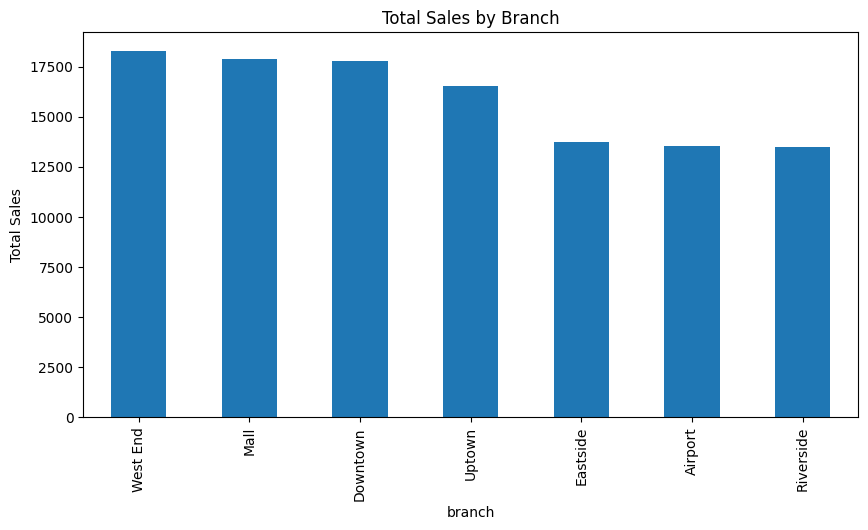

In [61]:
total_sales_by_branch.plot(kind='bar', figsize=(10,5), title='Total Sales by Branch', ylabel='Total Sales')
cust_rating

The West End branch recorded the highest total sales at 18,304.71,(17,876.49) and Downtown (17,784.92).
The Eastside branch achieved the highest average customer rating of 3.155, with Riverside (3.127) and Airport (3.053) following.

A notable trade-off exists: branches with the highest sales (West End, Mall) tend to have lower customer satisfaction, while branches with the highest customer ratings (Eastside, Riverside) tend to have lower sales volumes.

The Downtown branch demonstrated the most balanced performance, securing a position in the top three for total sales and maintaining a decent, moderate customer rating, suggesting a well-rounded operation.

***Insights or Next Steps:***

To improve overall performance, branches with high sales but low ratings (e.g., West End, Mall) should focus on enhancing customer experience to convert high volume into higher satisfaction and loyalty.

Branches with high customer ratings but lower sales (e.g., Eastside, Riverside) should explore strategies to boost sales, such as targeted marketing or increased visibility, without compromising their excellent service standards.

**Are customer ratings generally high or low?**

<Axes: title={'center': 'Customer Rating Distribution'}, xlabel='branch', ylabel='Average Rating'>

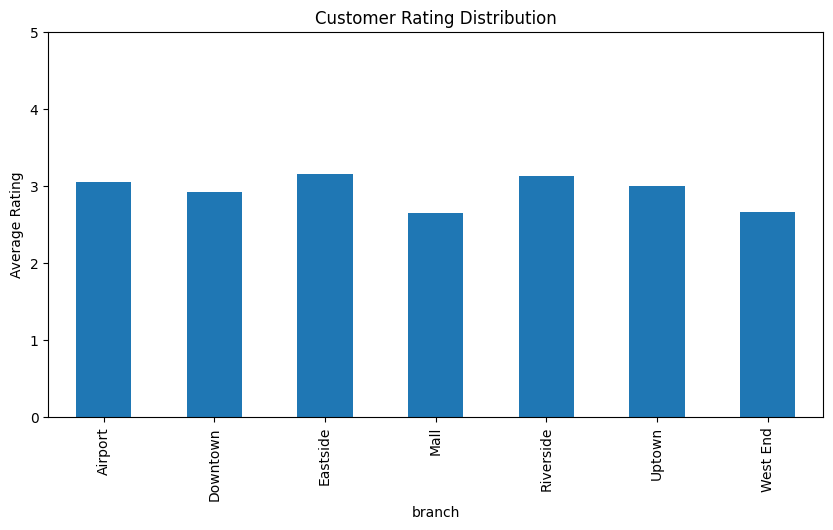

In [67]:
cust_rating.plot(kind='bar', figsize=(10,5), title='Customer Rating Distribution', ylabel='Average Rating', ylim=(0.0, 5.0))

As previously analyzed, the customer ratings generally fall within a moderate range, between approximately 2.6 and 3.2 out of a possible 5.0. This indicates that customer satisfaction is fairly consistent and moderate across the branches, rather than exceptionally high or low.

There is room for improvement on the customer satisfaction